In [ ]:
#importing neccessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/SFGSME/Client_Data.xlsx')

In [ ]:
df.head()

,Employment size,Region,Industry,Debt financing Approval rate,Government financing Approval rate,Lease financing Approval rate,Trade credit financing Approval rate,Sales Growth,Innovator/Non-innovator,Online Presence,Year of establishment of business,Method of possessing the business,Advanced technology adoption,Hired an External Consultant
0,1 to 4,Atlantic,"Agriculture, forestry, fishing and hunting, mi...",No,No,No,No,Negative,Innovator,Yes,2018-2020,started from scratch,business intelligence technologies,Yes
1,5 to 19,Quebec,Construction,Yes,No,No,No,No,Non-innovator,No,2010-2017,bought or acquired,design or information control technologies,No
2,20 to 99,Ontario,Manufacturing,Yes,Yes,Yes,Yes,Between 16% and 19%,Innovator,Yes,2000-2009,inherited,security or advanced authentication systems,Yes
3,100 to 499,Prairies,Wholesale Trade,Yes,Yes,Yes,No,20% or more,Non-innovator,Yes,prior to 2000,started from scratch,"material handling, supply chain or logistics t...",No
4,20 to 99,Ontario,Retail Trade,Yes,Yes,Yes,Yes,20% or more,Innovator,Yes,2018-2020,bought or acquired,processing or fabrication technologies,Yes


In [ ]:
df.shape

(15, 14)

In [ ]:
df.columns

Index(['Employment size', 'Region', 'Industry', 'Debt financing Approval rate',
       'Government financing Approval rate', 'Lease financing Approval rate',
       'Trade credit financing Approval rate', 'Sales Growth',
       'Innovator/Non-innovator', 'Online Presence',
       'Year of establishment of business',
       'Method of possessing the business', 'Advanced technology adoption',
       'Hired an External Consultant'],
      dtype='object')

In [ ]:
df['Employment size'].unique()

array(['1 to 4', '5 to 19', '20 to 99', '100 to 499'], dtype=object)

In [ ]:
df['Region'].unique()

array(['Atlantic', 'Quebec', 'Ontario', 'Prairies',
       'British Columbia and Territories'], dtype=object)

In [ ]:
df['Industry'].unique()

array(['Agriculture, forestry, fishing and hunting, mining and oil and gas extraction',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail Trade',
       'Transportation and Warehousing',
       'Professional, scientific and technical services',
       'Accommodation and food services', 'Other services',
       'Other industries from NAICS', 'Tourism',
       'Information and communication technologies',
       'Knowledge-based industries', 'Advanced technology',
       'Advanced manufacturing'], dtype=object)

In [ ]:
df['Sales Growth'].unique()

array(['Negative', 'No', 'Between 16% and 19%', '20% or more'],
      dtype=object)

In [ ]:
df['Year of establishment of business'].unique()

array(['2018-2020', '2010-2017', '2000-2009', 'prior to 2000'],
      dtype=object)

In [ ]:
df['Method of possessing the business'].unique()

array(['started from scratch', 'bought or acquired', 'inherited'],
      dtype=object)

In [ ]:
df['Advanced technology adoption'].nunique()

7

In [ ]:
df.isnull().sum()

Employment size                         0
Region                                  0
Industry                                0
Debt financing Approval rate            0
Government financing Approval rate      0
Lease financing Approval rate           0
Trade credit financing Approval rate    0
Sales Growth                            0
Innovator/Non-innovator                 0
Online Presence                         0
Year of establishment of business       0
Method of possessing the business       0
Advanced technology adoption            0
Hired an External Consultant            0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your pandas DataFrame with all columns in object dtype

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtype == 'object':
        # Encode the column with LabelEncoder
        df[col] = label_encoder.fit_transform(df[col].astype(str))

# Now all object columns are encoded with numeric labels

In [ ]:
df.head()

,Employment size,Region,Industry,Debt financing Approval rate,Government financing Approval rate,Lease financing Approval rate,Trade credit financing Approval rate,Sales Growth,Innovator/Non-innovator,Online Presence,Year of establishment of business,Method of possessing the business,Advanced technology adoption,Hired an External Consultant
0,0,0,3,0,0,0,0,2,0,1,2,2,0,1
1,3,4,4,1,0,0,0,3,1,0,1,0,2,0
2,2,2,7,1,1,1,1,1,0,1,0,1,6,1
3,1,3,14,1,1,1,0,0,1,1,3,2,4,0
4,2,2,11,1,1,1,1,0,0,1,2,0,5,1


Data Augmentation

In [ ]:
# Number of bootstrap samples you want to generate
num_bootstrap_samples = 500

# Initialize an empty list to store bootstrapped samples
bootstrapped_datasets = []

# Perform bootstrapping
for _ in range(num_bootstrap_samples):
    # Sample with replacement from the original dataset
    bootstrap_sample = df.sample(n=len(df), replace=True)

    # Append the bootstrap sample to the list
    bootstrapped_datasets.append(bootstrap_sample)

# Combine all bootstrapped samples into a single DataFrame
db = pd.concat(bootstrapped_datasets, ignore_index=True)

In [ ]:
print("Shape of bootstrapped_df:", db.shape)

Shape of bootstrapped_df: (7500, 14)


In [ ]:
db.head()

,Employment size,Region,Industry,Debt financing Approval rate,Government financing Approval rate,Lease financing Approval rate,Trade credit financing Approval rate,Sales Growth,Innovator/Non-innovator,Online Presence,Year of establishment of business,Method of possessing the business,Advanced technology adoption,Hired an External Consultant
0,0,0,3,0,0,0,0,2,0,1,2,2,0,1
1,3,2,5,0,1,0,0,0,1,1,2,0,5,1
2,0,3,12,0,1,1,1,0,0,1,2,2,4,1
3,2,1,1,0,1,1,1,0,0,1,1,2,3,1
4,0,0,3,0,0,0,0,2,0,1,2,2,0,1


In [ ]:
# Save the DataFrame to a CSV file
db.to_csv('SME_Data.csv', index=False)

Modelling

In [ ]:
# Display the class distribution of each target variable
target_columns = [
    'Debt financing Approval rate',
    'Government financing Approval rate',
    'Lease financing Approval rate',
    'Trade credit financing Approval rate'
]

for column in target_columns:
    print(f"Class distribution for {column}:")
    print(db[column].value_counts())
    print()

Class distribution for Debt financing Approval rate:
Debt financing Approval rate
1    4499
0    3001
Name: count, dtype: int64

Class distribution for Government financing Approval rate:
Government financing Approval rate
1    5027
0    2473
Name: count, dtype: int64

Class distribution for Lease financing Approval rate:
Lease financing Approval rate
0    4020
1    3480
Name: count, dtype: int64

Class distribution for Trade credit financing Approval rate:
Trade credit financing Approval rate
0    3957
1    3543
Name: count, dtype: int64



Handle Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target variables
X = db.drop(columns=target_columns)
y = db[target_columns]

# Apply SMOTE to each target variable individually
smote = SMOTE()

X_resampled_list = []
y_resampled_list = []

for column in target_columns:
    X_resampled, y_resampled = smote.fit_resample(X, y[column])
    X_resampled_list.append(X_resampled)
    y_resampled_list.append(y_resampled)

# Combine resampled features and targets back into a single DataFrame
X_resampled = pd.concat(X_resampled_list, axis=0)
y_resampled = pd.concat(y_resampled_list, axis=0)

# Merge resampled features and target variables into one DataFrame
resampled_db = X_resampled.copy()
for i, column in enumerate(target_columns):
    resampled_db[column] = y_resampled_list[i]

print("Shape of the resampled dataset:", resampled_db.shape)


Shape of the resampled dataset: (35006, 14)


Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    resampled_db.drop(columns=target_columns),
    resampled_db[target_columns],
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (28004, 10) (28004, 4)
Testing set shape: (7002, 10) (7002, 4)


Train the Classification Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
import numpy as np  # Import numpy for NaN handling

# Assuming target_columns and X_train, X_test, y_train, y_test are already defined
target_columns = [
    'Debt financing Approval rate',
    'Government financing Approval rate',
    'Lease financing Approval rate',
    'Trade credit financing Approval rate'
]

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = []

for model_name, model in models.items():
    print(f"Training model: {model_name}")

    # Train and evaluate the model for each target variable
    for column in target_columns:
        print(f"  Target variable: {column}")

        # Handle NaNs in y_train (replace with most frequent value)
        y_train_filled = y_train[column].fillna(y_train[column].mode()[0])  # Fill NaNs for training

        # Train the model using the filled y_train
        model.fit(X_train, y_train_filled)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Handle NaNs in y_test for evaluation
        y_test_filled = y_test[column].fillna(y_test[column].mode()[0])  # Fill NaNs for testing

        # Evaluate the model using the filled y_test
        accuracy = accuracy_score(y_test_filled, y_pred)
        precision = precision_score(y_test_filled, y_pred)
        recall = recall_score(y_test_filled, y_pred)
        f1 = f1_score(y_test_filled, y_pred)

        # Store the results
        results.append({
            'Model': model_name,
            'Target': column,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

        # Print classification report using the filled y_test
        print(classification_report(y_test_filled, y_pred))
        print()

Training model: Logistic Regression
  Target variable: Debt financing Approval rate
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      3214
         1.0       0.93      0.98      0.95      3788

    accuracy                           0.95      7002
   macro avg       0.95      0.94      0.95      7002
weighted avg       0.95      0.95      0.95      7002


  Target variable: Government financing Approval rate
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      2949
           1       0.91      1.00      0.95      4053

    accuracy                           0.94      7002
   macro avg       0.95      0.93      0.94      7002
weighted avg       0.95      0.94      0.94      7002


  Target variable: Lease financing Approval rate
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      3179
         1.0       1.00      0.82      0.90     

Compare Model Performance

In [ ]:
# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)# Print the comparison of model performances as a nice table

print("Model performance comparison:")
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

Model performance comparison:
+----+---------------------+--------------------------------------+--------------------+--------------------+--------------------+--------------------+
|    |        Model        |                Target                |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+----+---------------------+--------------------------------------+--------------------+--------------------+--------------------+--------------------+
| 0  | Logistic Regression |     Debt financing Approval rate     | 0.9461582405027135 | 0.9266950212659495 | 0.9778247096092925 | 0.9515735388567759 |
| 1  | Logistic Regression |  Government financing Approval rate  | 0.9414453013424736 | 0.9081335424602286 |        1.0         | 0.951855331141381  |
| 2  | Logistic Regression |    Lease financing Approval rate     | 0.9027420736932305 |        1.0         | 0.821867643212137  | 0.9022254127781766 |
| 3  | Logistic Regression | Trade credit financing Approv

Feature Importance

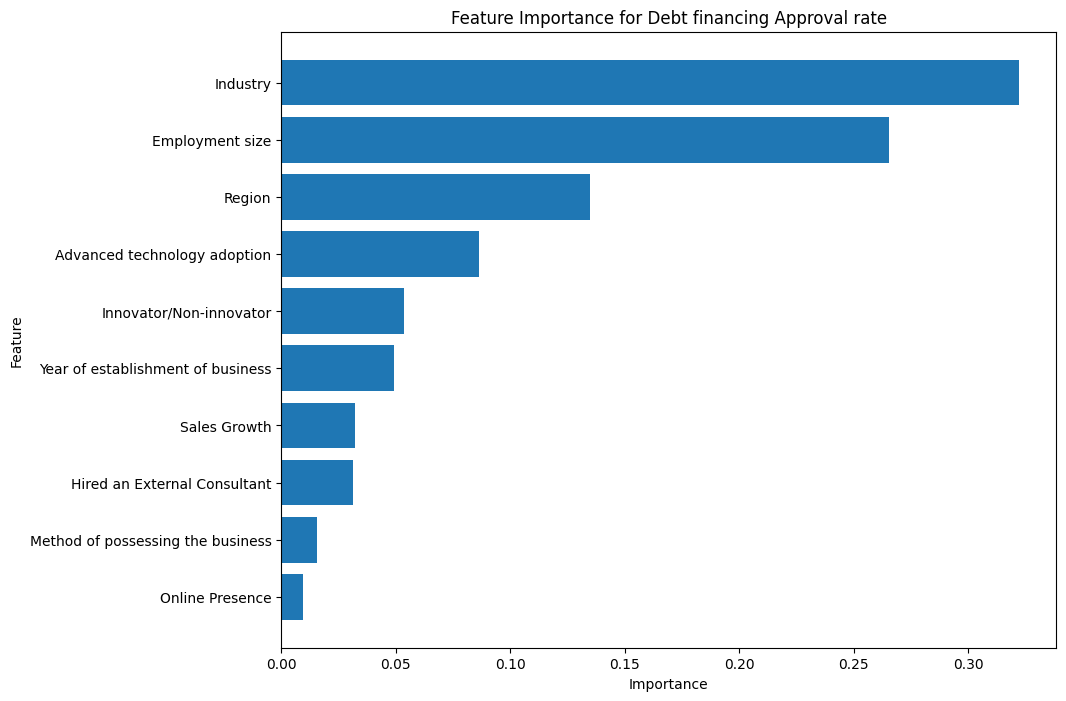

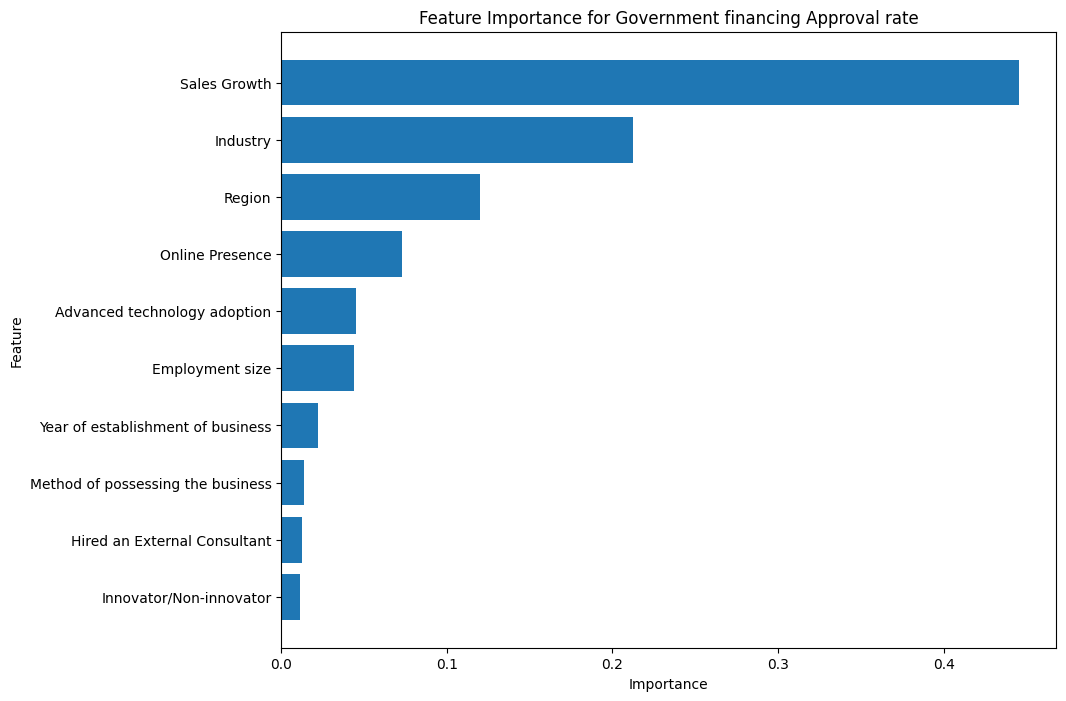

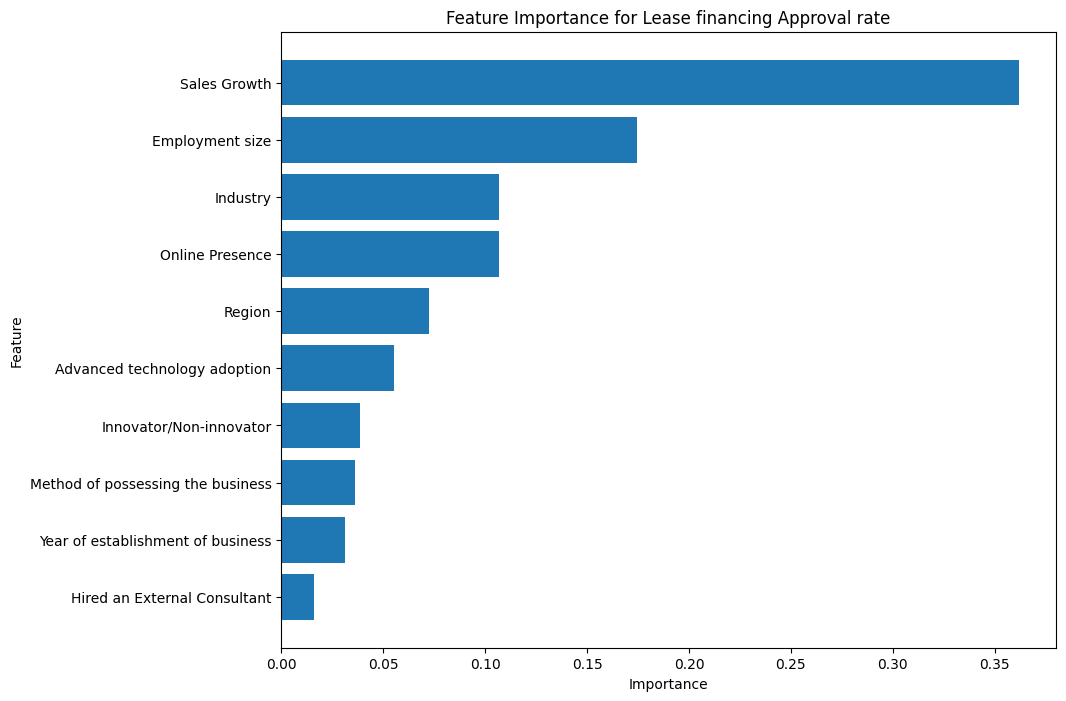

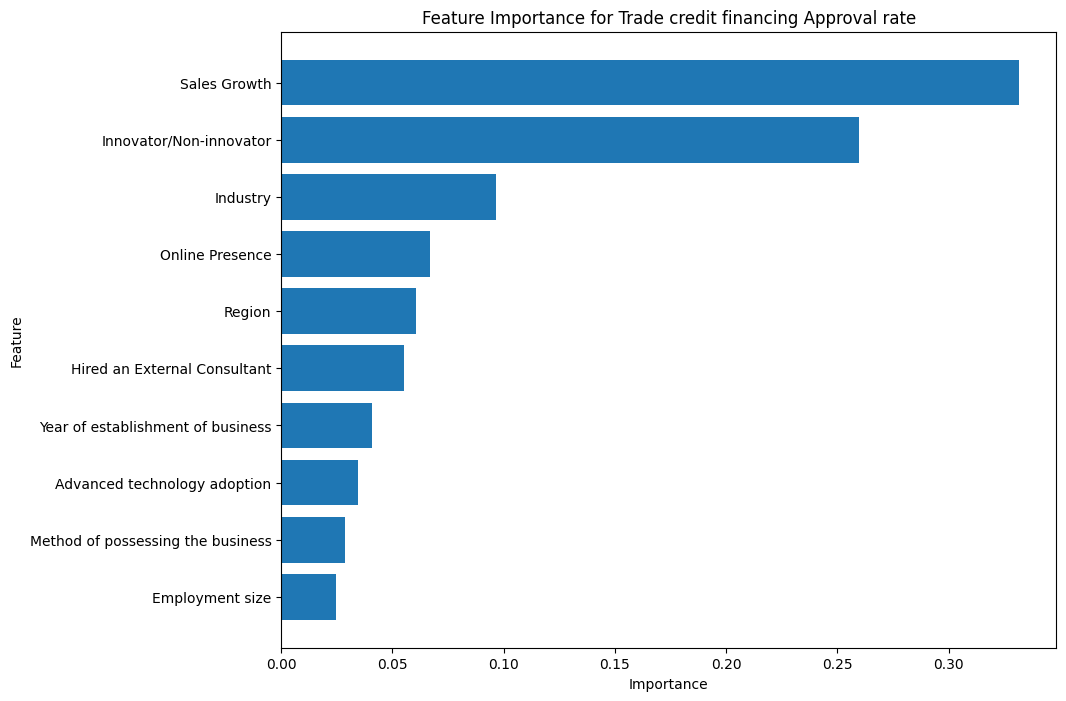

In [ ]:
for model_name in ['Random Forest']:
    model = models[model_name]
    for column in target_columns:
        model.fit(X_train, y_train[column].fillna(y_train[column].mode()[0]))  # Train the model
        importances = model.feature_importances_
        features = X_train.columns

        importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Plot feature importances
        plt.figure(figsize=(10, 8))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance for {column}')
        plt.gca().invert_yaxis()
        plt.show()